In [11]:
# revisiting the XOR and donut problems to show how features
# can be learned automatically using neural networks.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for binary classification! no softmax here

def forward(X, W1, b1, W2, b2):
    # assume we will use tang() on hidden
    # and softmax on output
    Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    return Y, Z

def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)

def derivative_w2(Z, T, Y):
    # Z is (N, M)
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()

def derivative_w1(X, Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1-Z)
    dZ = np.outer(T-Y, W2) * (1 - Z * Z)
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * (1 - Z * Z)
    return dZ.sum(axis=0)

def cost(T, Y):
    tot = 0
    for n in range(len(T)):
        if T[n] == 1:
            tot += np.log(Y[n])
        else:
            tot += np.log(1 - Y[n])
    return tot

def test_xor():
    X = np.array([[0,0], [0,1], [1,0], [1,1]])
    Y = np.array([0, 1, 1, 0])
    W1 = np.random.randn(2, 4)
    b1 = np.random.randn(4)
    W2 = np.random.randn(4)
    b2 = np.random.randn(1)
    LL = [] # keep track of log likelihoods
    learning_rate = 0.0005
    regularization = 0.
    last_error_rate = None
    for i in range(100000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean()
        if er != last_error_rate:
            last_error_rate = er
            print("error rate:", er)
            print("true:", Y)
            print("pred:", prediction)
        if LL and ll < LL[-1]:
            print("early exit") # log likelihood increases
            break
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, 2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 10000 == 0:
            print(ll)
    print("final classification rate:", 1 - np.abs(prediction - Y).mean())
    
test_xor()

error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
-3.43412356225
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  1.  1.  1.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 0.  0.  1.  1.]
early exit
final classification rate: 0.5


error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  1.  1.]
-3.3375276465
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  1.  1.  1.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 0.  0.  1.  1.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 0.  0.  1.  0.]
error rate: 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
-1.66110324222
-1.27565200423
-1.11455761574
-0.965699451792
-0.803932558653
-0.70680537127
-0.638187591308
-0.58166544549
-0.533449085234
-0.492021010196
-0.456128375485
-0.42475114246
-0.397233958875
-0.373150005416
-0.352119299044
-0.333744179435
-0.317628139504
-0.303407023275
-0.290764628058
-0.279432683384
-0.269181002988
-0.259802770584
-0.251098863855
-0.242865165698
-0.234888607182
-0.226960393596
-0.218913506985
-0.210677728525
-0.20232043978
final classification rate: 1.0


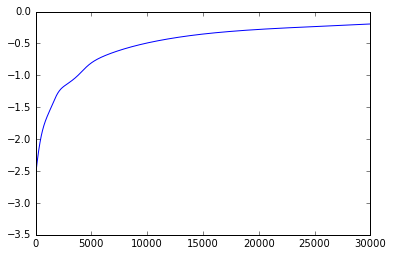

In [15]:
def test_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    W1 = np.random.randn(2, 5)
    b1 = np.zeros(5)
    W2 = np.random.randn(5)
    b2 = 0
    LL = [] # keep track of likelihoods
    learning_rate = 10e-3
    regularization = 0.
    last_error_rate = None
    for i in range(30000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.mean(prediction != Y)
        if er != last_error_rate:
            last_error_rate = er
            print("error rate:", er)
            print ("true:", Y)
            print ("pred:", prediction)
        # if LL and ll < LL[-1]:
        #     print "early exit"
        #     break
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 1000 == 0:
            print (ll)

    print("final classification rate:", np.mean(prediction == Y))
    plt.plot(LL)
    plt.show()
    
test_xor()

/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


i: 0 ll: -807.791536957 classification rate: 0.489
i: 100 ll: -714.623821242 classification rate: 0.464
i: 200 ll: -703.167599594 classification rate: 0.521
i: 300 ll: -694.502542623 classification rate: 0.563
i: 400 ll: -689.094046972 classification rate: 0.606
i: 500 ll: -687.646802651 classification rate: 0.578
i: 600 ll: -687.945189329 classification rate: 0.56
i: 700 ll: -689.198134714 classification rate: 0.539
i: 800 ll: -690.396984192 classification rate: 0.527
i: 900 ll: -690.512511211 classification rate: 0.52
i: 1000 ll: -690.124549819 classification rate: 0.512
i: 1100 ll: -689.944256737 classification rate: 0.513
i: 1200 ll: -689.80093417 classification rate: 0.52
i: 1300 ll: -689.668603587 classification rate: 0.509
i: 1400 ll: -689.559059358 classification rate: 0.525
i: 1500 ll: -689.469578335 classification rate: 0.536
i: 1600 ll: -689.392160417 classification rate: 0.545
i: 1700 ll: -689.322470961 classification rate: 0.555
i: 1800 ll: -689.26070692 classification rat

/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in exp


i: 5500 ll: -688.21762501 classification rate: 0.541
i: 5600 ll: -688.178322053 classification rate: 0.54
i: 5700 ll: -688.138420366 classification rate: 0.541
i: 5800 ll: -688.097912007 classification rate: 0.539
i: 5900 ll: -688.056787538 classification rate: 0.538
i: 6000 ll: -688.015036386 classification rate: 0.537
i: 6100 ll: -687.972647208 classification rate: 0.537
i: 6200 ll: -687.929608228 classification rate: 0.536
i: 6300 ll: -687.885907559 classification rate: 0.537
i: 6400 ll: -687.84153349 classification rate: 0.538
i: 6500 ll: -687.796474754 classification rate: 0.538
i: 6600 ll: -687.750720756 classification rate: 0.539
i: 6700 ll: -687.704261776 classification rate: 0.538
i: 6800 ll: -687.657089145 classification rate: 0.538
i: 6900 ll: -687.609195388 classification rate: 0.536
i: 7000 ll: -687.560574343 classification rate: 0.537
i: 7100 ll: -687.51122126 classification rate: 0.538
i: 7200 ll: -687.461132866 classification rate: 0.536
i: 7300 ll: -687.410307424 class

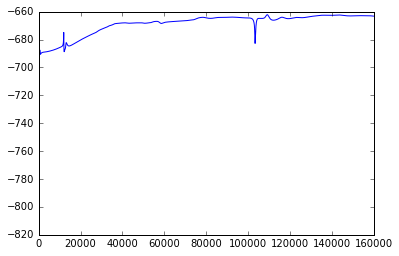

In [19]:
def test_donut():
    # donut example
    N = 1000
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(int(N/2)) + R_inner
    theta = 2*np.pi*np.random.random(N/2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(int(N/2)) + R_outer
    theta = 2*np.pi*np.random.random(int(N/2))
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*int(N/2) + [1]*int(N/2))

    n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = [] # keep track of likelihoods
    learning_rate = 0.00005
    regularization = 0.2
    last_error_rate = None
    for i in range(160000):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        er = np.abs(prediction - Y).mean()
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 100 == 0:
            print ("i:", i, "ll:", ll, "classification rate:", 1 - er)
    plt.plot(LL)
    plt.show()
    
test_donut()